1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/iris.csv')

In [5]:
df.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [10]:
#changing variety column to numbers
from sklearn import preprocessing
label_coder = preprocessing.LabelEncoder()
variety_encoded = label_coder.fit_transform(df.variety)
variety_encoded = np.array(variety_encoded)

In [11]:
#creating X, y
X = df.drop("variety", 1)
y = variety_encoded

In [14]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [16]:
#Creating model and training with k=3
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=3)

In [19]:
model.predict(X_test)[:10]

array([0, 2, 1, 1, 1, 1, 0, 2, 1, 2])

In [18]:
y_test[:10]

array([0, 2, 1, 1, 1, 1, 0, 2, 2, 2])

In [22]:
#Calculating score
model.score(X_test, y_test)

0.9666666666666667

In [30]:
X_train

,sepal.length,sepal.width,petal.length,petal.width
104,6.5,3.0,5.8,2.2
65,6.7,3.1,4.4,1.4
86,6.7,3.1,4.7,1.5
98,5.1,2.5,3.0,1.1
69,5.6,2.5,3.9,1.1
...,...,...,...,...
3,4.6,3.1,1.5,0.2
138,6.0,3.0,4.8,1.8
103,6.3,2.9,5.6,1.8
57,4.9,2.4,3.3,1.0


In [37]:
#Predicting [15.7,2.8,9.5,0.1] y [1.7,3.8,4.5,11.3]
example_1 = np.array([15.7,2.8,9.5,0.1])
example_2 = np.array([1.7,3.8,4.5,11.3])
example_1 = example_1.reshape(1, -1)
example_2 = example_2.reshape(1, -1)

In [40]:
prediction_1 = model.predict(example_1)
prediction_2 = model.predict(example_2)
print("Prediction 1: ", prediction_1)
print("Prediction 2: ", prediction_2)

Prediction 1:  [2]
Prediction 2:  [2]


Both are type2: Virginica

In [41]:
#Creating model and training with k=7

from sklearn.neighbors import KNeighborsClassifier

model_1 = KNeighborsClassifier(n_neighbors=7)
model_1.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=7)

In [42]:
model_1.score(X_test, y_test)

1.0

Now it has 100% accurancy.

In [43]:
#Making predictions on the examples. 
prediction_1 = model_1.predict(example_1)
prediction_2 = model_1.predict(example_2)
print("Prediction 1: ", prediction_1)
print("Prediction 2: ", prediction_2)

Prediction 1:  [2]
Prediction 2:  [2]


- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.


([<matplotlib.axis.XTick at 0x1cca71f0>,
 <a list of 5 Text major ticklabel objects>)

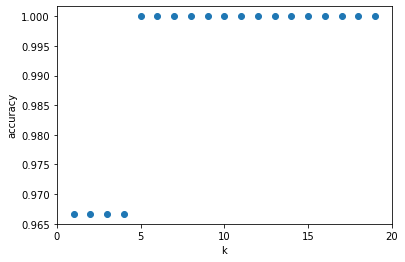

In [44]:
k_range = range(1, 20)
scores = []
for elem in k_range:
    model = KNeighborsClassifier(n_neighbors = elem)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

From k=5 the accuracy is 1. 

 - Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)

model_2 = KNeighborsClassifier(n_neighbors=7)
model_2.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=7)

In [48]:
model_2.score(X_test, y_test)

0.9333333333333333

Yes, it used to be score of 1 with k=7 and now its only 0.93. The model did not have enough data to train with and therefor the predictions are worse. 

- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?


In [57]:
df_1 = df[(df.variety == 'Versicolor') | (df.variety == 'Virginica')]
df_1.variety.unique()

array(['Versicolor', 'Virginica'], dtype=object)

In [64]:
label_coder = preprocessing.LabelEncoder()
variety_encoded_1 = label_coder.fit_transform(df_1.variety)
variety_encoded_1 = np.array(variety_encoded_1)

In [66]:
X = df_1.drop("variety", 1)
y = variety_encoded_1

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60)

model_3 = KNeighborsClassifier(n_neighbors=7)
model_3.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=7)

In [68]:
model_3.score(X_test, y_test)

0.9333333333333333

In [ ]:
# in comparison to the exercise before it did not make a change to remove one column. 
# below another try with test size 20 again.

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

model_4 = KNeighborsClassifier(n_neighbors=7)
model_4.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=7)

In [74]:
model_4.score(X_test, y_test)

0.9

The score is now better then before, but when we had 3 classes and used test size 20% and k=7 we had an accuracy of 1, so deleting one class has worsened the model. Also when using k=3, the score is worse.

- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

Yes, the model gives a high accuracy score. When using the 3 classes and k=5 or higher we have a 100% accuracy score. 